# Assignment: effect of clouds on the planetary energy balance

In this exercise you are going to compute the effect of clouds on the planetary energy balance, with the help of a simple 1-column model of the atmosphere.

In [18]:
# These are the modules we need
import numpy as np
import matplotlib.pyplot as plt

We define some constants:

In [19]:
s_0 = 1367  # Solar constant (W m-2)
sigma = 5.670e-8  # Stefan–Boltzmann constant
t_s = 288  # Average temperature of the Earth's surface (K)
t_clr = 261  # Radiation temperature of a clear sky atmosphere (K)
gamma = -6.5  # Lapse-rate in the atmoshpere (K km-1)
surface_albedo = 0.12  # Albedo of the surface of the Earth

## Effect of low clouds on the EB 

To isolate the effect of clouds, we assume a very simple representation of the atmosphere as a simple column, free of other clouds. The Temperature of the cloud would then be: 

$T_{Cloud} = T_{Surface} + \gamma \, z $, 

with $z$ the cloud altitude (km) and $\gamma$ the lapse-rate.

**Q: compute the temperature (K) of a cloud at z = 5km, assuming a constant lapse rate and an average surface temperature of 288K:**

In [20]:
z = 5  
t_c = t_s + z*gamma

print('Temperature (K) of cloud at z = 5km (assuming a constant lapse rate & average t_s of 288K is ' + str(t_c))

Temperature (K) of cloud at z = 5km (assuming a constant lapse rate & average t_s of 288K is 255.5


Now assume that the cloud absorbs all the IR radiation emited by the surface (a reasonable approximation), while emmitting IR directly back to space according to its own temperature. So the total energy change of the climate system in the longwave (LW) spectrum would be:

$\Delta E_{LW} = LW_{ClrSky}\uparrow - LW_{Cloud}\uparrow$

So, according to Stefan-Boltzmann:

$\Delta E_{LW} = \sigma T_{ClrSky}^4 - \sigma T_{Cloud}^4$

Where $T_{ClrSky}$ is the radiation temperature of a clear sky atmosphere (here assumed to be 261 K).

**Q: compute the approximate "average" altitude at which the clear sky atmosphere emits at 261 K (from the standard lapse rate). This will give the approximate minimum altitude at which the equation above is valid.**

In [21]:
z_avg = (t_clr-t_s)/gamma
print('The clear sky emits at ' + str(z_avg)+ ' km ')

The clear sky emits at 4.153846153846154 km 


**Q: compute the effect of a low cloud on the LW energy balance of the climate system. Is the cloud a LW energy loss or an energy gain for the system?**

In [22]:
delta_EB_lw = sigma*(t_clr**4)-sigma*(t_c**4)

print('The effect of low clouds on the LW-radiative balance is ' + str(delta_EB_lw) + ' W/m^2, so a gain of energy')

The effect of low clouds on the LW-radiative balance is 21.48700937315624 W/m^2, so a gain of energy


Now consider the shortwave effects of the cloud if it has an albedo of 0.5. The net difference for the climate system is simply the increased loss in solar energy because of an increased reflection:

$\Delta E_{SW} = - S_0 / 4 \cdot (\alpha _{Cloud} - \alpha _{Earth} ) $

**Q: compute the effect of a low cloud on the shortwave (SW) energy balance of the climate system. Is the cloud a SW energy loss or an energy gain for the system?**

In [23]:
cloud_albedo = 0.5
delta_EB_sw = -s_0/4*(cloud_albedo - surface_albedo)

print('The effect of low clouds on SW-radiative balance is ' + str(delta_EB_sw) + 'W/m^2, so a loss of energy')

The effect of low clouds on SW-radiative balance is -129.865W/m^2, so a loss of energy


Finally, the net energy difference for the climate system is:
    
$\Delta E_{TOT} = \Delta E_{SW} + \Delta E_{LW}$

**Q: compute the effect of a low cloud on the total (SW + LW) energy balance of the climate system. Is the low cloud a total energy loss or an energy gain for the system?**

In [24]:
delta_EB_tot = delta_EB_sw + delta_EB_lw

print('The effect of low clouds in the total radiative balance is ' + str(delta_EB_tot) + 'W/m^2,  so an energy loss' )

The effect of low clouds in the total radiative balance is -108.37799062684377W/m^2,  so an energy loss


## Effect of high clouds on the EB 

**Q: repeat the calculations above to compute the effect of a high cloud (z = 12km, albedo unchanged) on the total energy balance of the climate system. Is the high cloud a total energy loss or an energy gain for the system?**

In [25]:
z = 12 
t_c = t_s + z*gamma
print(t_c)

delta_EB_lw = sigma*(t_clr**4)-sigma*(t_c**4)
print(delta_EB_lw)

delta_EB_sw = -s_0/4*(cloud_albedo - surface_albedo)
print(delta_EB_sw)

delta_EB_tot = delta_EB_sw + delta_EB_lw
print('The effect of high clouds on the total radiative balance is ' + str(delta_EB_tot) + ' W/m^2, so an energy gain of the system')

210.0
152.84395834469998
-129.865
The effect of high clouds on the total radiative balance is 22.978958344699976 W/m^2, so an energy gain of the system


## And now automate things a little bit

**Q: repeat the calculations above for the whole range of altitudes between 4 and 12 km (see the previous lesson for how to do this). Plot the curve.**

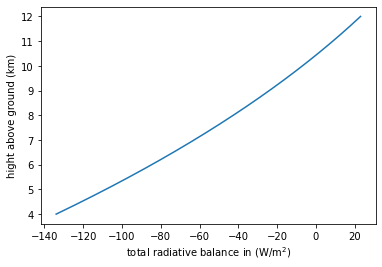

In [46]:
z_lap = np.linspace(start = 4, stop = 12, num = 1000)
t_c_lap = t_s + z_lap*(gamma)
t_c_lap
delta_EB_lw_lap = sigma*(t_clr**4)-sigma*(t_c_lap**4)
delta_EB_lw_lap
delta_EB_sw = -s_0/4*(cloud_albedo - surface_albedo)
delta_EB_sw
delta_EB_tot_lap = delta_EB_sw + delta_EB_lw_lap
delta_EB_tot_lap

plt.plot(delta_EB_tot_lap, z_lap);
plt.ylabel('hight above ground (km)')
plt.xlabel('total radiative balance in (W/m${^2}$)');

**Q: repeat the calculations above, for three values of the cloud albedo: 0.3, 0.5, 0.7. Plot the three curves on the same plot and add a legend to the plots (see the "Getting started" notebook for guidance).**

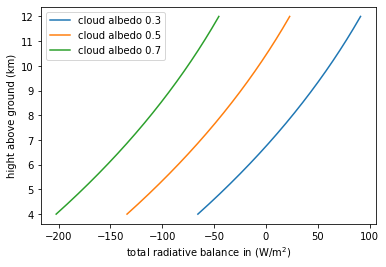

In [51]:
cloud_alb_1 = 0.3
cloud_alb_2 = 0.5 
cloud_alb_3 = 0.7

z_lap = np.linspace(start = 4, stop = 12, num = 1000)
t_c_lap = t_s + z_lap*(gamma)
t_c_lap
delta_EB_lw_lap = sigma*(t_clr**4)-sigma*(t_c_lap**4)
delta_EB_lw_lap
delta_EB_sw_1 = -s_0/4*(cloud_alb_1 - surface_albedo)
delta_EB_sw_2 = -s_0/4*(cloud_alb_2 - surface_albedo)
delta_EB_sw_3 = -s_0/4*(cloud_alb_3 - surface_albedo)
delta_EB_tot_lap_1 = delta_EB_sw_1 + delta_EB_lw_lap
delta_EB_tot_lap_2 = delta_EB_sw_2 + delta_EB_lw_lap
delta_EB_tot_lap_3 = delta_EB_sw_3 + delta_EB_lw_lap
plt.plot(delta_EB_tot_lap_1, z_lap, label = ('cloud albedo 0.3'))
plt.plot(delta_EB_tot_lap_2, z_lap, label = ('cloud albedo 0.5'))
plt.plot(delta_EB_tot_lap_3, z_lap, label = ('cloud albedo 0.7'))
plt.legend(loc = 'best')
plt.ylabel('hight above ground (km)')
plt.xlabel('total radiative balance in (W/m${^2}$)');




**Q: discuss the features of the plot, and the conditions necessary for a cloud to be an energy gain or an energy loss for the climate system. Now search for typical values of cloud albedos depending on their type, and come back to your plot for comparison.**

-> Total Radiative balance values:  negative are energy loss and positive are energy gain of the system;
-> the higher the cloud albedo, the higher the energy losses of the system; 
-> the higher up in atmosphere, the smaller the energy loss of the system; 
-> 

If you complicate things a bit by noticing that high clouds have a low albedo and low clouds a high albedo while thick clouds have a high albedo but also a high cloud top you can imagine that the system becomes extremely sensitive.

**The processes governing cloud albedo are extremely complex. The uncertainty about changes in the clouds frequency, altitude, and albedo are one of the highest uncertainty in the climate models.**

More info on [Skeptikal Science's page on the topic](http://www.skepticalscience.com/clouds-negative-feedback-basic.htm) (basic and intermediate)